# Van Gogh Brothers Letter Analysis with Machine Learning

### Web Scraping, Text Mining, Word Cloud, and Sentiment Analysis with Machine Learning

#### 665 Letters Sent by Vincent to His Brother (1872 to 1890)

1. **Web Scraping:** Scraping one letter, and then all letters (being careful to obtain only Vincent > Theo letters);
2. **Data Analysis:** Text mining, filtering, counting, and removing stopwords (default and custom for my analysis);
3. **Word Cloud:** Plotting a word cloud;
4. **Sentiment Analysis:** Using a lexicon-based Python library and machine learning (unsupervised learning).


Source: [vangoghletters](https://vangoghletters.org/vg/letters.html)

## Personal Takeaways of this analysis:
- To do a good sentimental analysis I've tried and researched some Deep Learning models (hugging face) but I've decided to use Unsupiervised learning - I cound't evalluate if the models performed well because of the dataset caracteristics;
- That's because the specificity of the problem: I had big letters and old text while the models were trained with short text and with Twitter and there was no model pretrained for sentimental analysis with 3 classification tasks;
Ps: The objective was not to train any model; 


## Imports

In [1]:
#web scraping
import requests
from bs4 import BeautifulSoup
from requests_html import HTMLSession
from pprint import pprint

#text mining
from collections import Counter
import re

#classics
import pandas as pd
import numpy as np

#viz
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns

#Sentiment Analysis
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

## 1) Web Srapping 
#### First only the info from 1 letter to test if it works, then do it for all the letters and then gather inside just 1 variable (how the Cloud of Words works)

### 1.1) Only the info from 1 letter 

In [2]:
#Creating and instantiation a parsing request from beatiful soap to the website with the letters
url = 'https://vangoghletters.org/vg/letters/let001/letter.html'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [3]:
#Analyzing the HTML code in VSCode (Clean view)
print(soup.prettify())

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="content-Type"/>
  <link href="/vg/css/decovivago.css" rel="stylesheet" type="text/css"/>
  <link href="/vg/calendar/calendar-win2k-1.css" rel="stylesheet" type="text/css"/>
  <script src="/vg/calendar/calendar-min.js" type="text/javascript">
  </script>
  <script language="JavaScript" src="/vg/js/prototype.js" type="text/javascript">
  </script>
  <script language="JavaScript" src="/vg/js/scriptaculous.js" type="text/javascript">
  </script>
  <script language="JavaScript" src="/vg/js/decovivago.js" type="text/javascript">
  </script>
  <!-- generated by decovivago.rb -->
  <!-- created: Fri Oct 29 11:50:16 +0000 2021 -->
  <title>
   001 (001, 1): To Theo van Gogh. The Hague, Sunday, 29 September 1872. - Vincent van Gogh Letters
  </tit

In [4]:
#After the analysis, we want only the "div" and the p class (included the idented)
letter_html = soup.find_all("div", class_="p")
print(letter_html)

[<div class="p">The Hague, 29 September 1872.</div>, <div class="p">My dear Theo,</div>, <div class="p">Thanks for your letter, I was glad to hear that you got back safely. I missed you the first few days, and it was strange for me not to find you when I came home in the afternoon.</div>, <div class="p indent">We spent some pleasant days together, and actually did go for some walks and see a thing or two whenever we had the chance.</div>, <div class="p indent">What terrible weather, you must feel <i>anxious</i> on your walks to Oisterwijk.<span class="anchor"><a href="#" id="translation-noteref-n-1" name="translation-noteref-n-1" onclick="javascript:columns.showNote(this,'n-1');return false;" title="click to open or close note">1</a></span> Yesterday there were trotting races on the occasion of the exhibition,<span class="anchor"><a href="#" id="translation-noteref-n-2" name="translation-noteref-n-2" onclick="javascript:columns.showNote(this,'n-2');return false;" title="click to open o

In [5]:
#Finding all the div and the p class, and instantiating inside a list
letter_html = soup.find_all("div", class_=["p", "indent"])
letter_html

[<div class="p">The Hague, 29 September 1872.</div>,
 <div class="p">My dear Theo,</div>,
 <div class="p">Thanks for your letter, I was glad to hear that you got back safely. I missed you the first few days, and it was strange for me not to find you when I came home in the afternoon.</div>,
 <div class="p indent">We spent some pleasant days together, and actually did go for some walks and see a thing or two whenever we had the chance.</div>,
 <div class="p indent">What terrible weather, you must feel <i>anxious</i> on your walks to Oisterwijk.<span class="anchor"><a href="#" id="translation-noteref-n-1" name="translation-noteref-n-1" onclick="javascript:columns.showNote(this,'n-1');return false;" title="click to open or close note">1</a></span> Yesterday there were trotting races on the occasion of the exhibition,<span class="anchor"><a href="#" id="translation-noteref-n-2" name="translation-noteref-n-2" onclick="javascript:columns.showNote(this,'n-2');return false;" title="click to op

In [6]:
#Extracting only the words in the letter
letter = []
for sentence in letter_html:
    string = sentence.string
    if string:
        letter.append(string)

letter = letter[:-2] #pegar tudo menos os últimos 2 itens da lista.

letter

['The Hague, 29 September 1872.',
 'My dear Theo,',
 'Thanks for your letter, I was glad to hear that you got back safely. I missed you the first few days, and it was strange for me not to find you when I came home in the afternoon.',
 'We spent some pleasant days together, and actually did go for some walks and see a thing or two whenever we had the chance.',
 'Your loving',
 'Vincent']

### ☝️ Great, work done (1 letter)!

### 1.2) 👇 Now bellow let's get the number of the Gogh's letters there are for Theo only

In [7]:
#Now I need to obtain the number of the letters from vincent to theo:
link2 = "https://vangoghletters.org/vg/letters.html"
response2 = requests.get(link2)
soup2 = BeautifulSoup(response2.content, 'html.parser')

In [ ]:
letter_html2 = soup2.find_all("div", id="searchresult")
print(letter_html2)

[<div id="searchresult"><ul>
<li value="001"><a href="/vg/letters/let001/letter.html">001   To Theo van Gogh. The Hague, Sunday, 29 September 1872.</a></li>
<li value="001a"><a href="/vg/letters/let001a/letter.html">001a   To Hendrik Verzijl. The Hague, Saturday, 26 October 1872.</a></li>
<li value="002"><a href="/vg/letters/let002/letter.html">002   To Theo van Gogh. The Hague, Friday, 13 December 1872.</a></li>
<li value="003"><a href="/vg/letters/let003/letter.html">003   To Theo van Gogh. The Hague, mid-January 1873.</a></li>
<li value="004"><a href="/vg/letters/let004/letter.html">004   To Theo van Gogh. The Hague, Tuesday, 28 January 1873.</a></li>
<li value="005"><a href="/vg/letters/let005/letter.html">005   To Theo van Gogh. The Hague, Monday, 17 March 1873.</a></li>
<li value="006"><a href="/vg/letters/let006/letter.html">006   To Theo van Gogh. The Hague, Monday, 24 March 1873.</a></li>
<li value="007"><a href="/vg/letters/let007/letter.html">007   To Theo van Gogh. The Hagu

In [9]:
#Extracting only the words in the letter
letter2 = []
for sentence in letter_html2:
    string2 = sentence.get_text(strip=True)
    if string2:
        letter2.append(string2)


print(letter2)

['001 \xa0 To Theo van Gogh. The Hague, Sunday, 29 September 1872.001a \xa0 To Hendrik Verzijl. The Hague, Saturday, 26 October 1872.002 \xa0 To Theo van Gogh. The Hague, Friday, 13 December 1872.003 \xa0 To Theo van Gogh. The Hague, mid-January 1873.004 \xa0 To Theo van Gogh. The Hague, Tuesday, 28 January 1873.005 \xa0 To Theo van Gogh. The Hague, Monday, 17 March 1873.006 \xa0 To Theo van Gogh. The Hague, Monday, 24 March 1873.007 \xa0 To Theo van Gogh. The Hague, Monday, 5 May 1873.008 \xa0 To Theo van Gogh. The Hague, Friday, 9 May 1873.009 \xa0 To Theo van Gogh. London, Friday, 13 June 1873.010 \xa0 To Willem and Caroline van Stockum-Haanebeek. London, Wednesday, 2 July 1873.011 \xa0 To Theo van Gogh. London, Sunday, 20 July 1873.012 \xa0 To Willem and Caroline van Stockum-Haanebeek. London, Thursday, 7 August 1873.013 \xa0 To Theo van Gogh. London, Saturday, 13 September 1873.014 \xa0 To Willem and Caroline van Stockum-Haanebeek. London, between about Thursday, 16 October and Fr

In [10]:
letter2

['001 \xa0 To Theo van Gogh. The Hague, Sunday, 29 September 1872.001a \xa0 To Hendrik Verzijl. The Hague, Saturday, 26 October 1872.002 \xa0 To Theo van Gogh. The Hague, Friday, 13 December 1872.003 \xa0 To Theo van Gogh. The Hague, mid-January 1873.004 \xa0 To Theo van Gogh. The Hague, Tuesday, 28 January 1873.005 \xa0 To Theo van Gogh. The Hague, Monday, 17 March 1873.006 \xa0 To Theo van Gogh. The Hague, Monday, 24 March 1873.007 \xa0 To Theo van Gogh. The Hague, Monday, 5 May 1873.008 \xa0 To Theo van Gogh. The Hague, Friday, 9 May 1873.009 \xa0 To Theo van Gogh. London, Friday, 13 June 1873.010 \xa0 To Willem and Caroline van Stockum-Haanebeek. London, Wednesday, 2 July 1873.011 \xa0 To Theo van Gogh. London, Sunday, 20 July 1873.012 \xa0 To Willem and Caroline van Stockum-Haanebeek. London, Thursday, 7 August 1873.013 \xa0 To Theo van Gogh. London, Saturday, 13 September 1873.014 \xa0 To Willem and Caroline van Stockum-Haanebeek. London, between about Thursday, 16 October and Fr

In [11]:
letter2[0]

'001 \xa0 To Theo van Gogh. The Hague, Sunday, 29 September 1872.001a \xa0 To Hendrik Verzijl. The Hague, Saturday, 26 October 1872.002 \xa0 To Theo van Gogh. The Hague, Friday, 13 December 1872.003 \xa0 To Theo van Gogh. The Hague, mid-January 1873.004 \xa0 To Theo van Gogh. The Hague, Tuesday, 28 January 1873.005 \xa0 To Theo van Gogh. The Hague, Monday, 17 March 1873.006 \xa0 To Theo van Gogh. The Hague, Monday, 24 March 1873.007 \xa0 To Theo van Gogh. The Hague, Monday, 5 May 1873.008 \xa0 To Theo van Gogh. The Hague, Friday, 9 May 1873.009 \xa0 To Theo van Gogh. London, Friday, 13 June 1873.010 \xa0 To Willem and Caroline van Stockum-Haanebeek. London, Wednesday, 2 July 1873.011 \xa0 To Theo van Gogh. London, Sunday, 20 July 1873.012 \xa0 To Willem and Caroline van Stockum-Haanebeek. London, Thursday, 7 August 1873.013 \xa0 To Theo van Gogh. London, Saturday, 13 September 1873.014 \xa0 To Willem and Caroline van Stockum-Haanebeek. London, between about Thursday, 16 October and Fri

In [12]:
df = pd.DataFrame(data=letter2)
df

0
0  001   To Theo van Gogh. The Hague, Sunday, 29 ...

In [13]:
df[0]

0    001   To Theo van Gogh. The Hague, Sunday, 29 ...
Name: 0, dtype: object

In [14]:
#df[0] = df[0].str.split(r'(?=\d{3}\s) To Theo')
df[0] = df[0].str.split(r'(?=\d{3}\s+To Theo van Gogh)') #importante aqui: estou splitando em outras listas tudo que for 3 digitos + palavra to theo van gogh
#r'':raw string
#(?=...):Lookahead assertion divisão ocorrerá antes do padrão que ele encontrar, sem remover o padrão em si do texto.
#\d{3}:três dígitos consecutivos
#\s+:um ou mais espaços em branco
df[0]

0    [, 001   To Theo van Gogh. The Hague, Sunday, ...
Name: 0, dtype: object

In [15]:
df

0
0  [, 001   To Theo van Gogh. The Hague, Sunday, ...

In [16]:
df_dividido = df.explode(0).reset_index(drop=True)
df_dividido

0
0                                                     
1    001   To Theo van Gogh. The Hague, Sunday, 29 ...
2    002   To Theo van Gogh. The Hague, Friday, 13 ...
3    003   To Theo van Gogh. The Hague, mid-January...
4    004   To Theo van Gogh. The Hague, Tuesday, 28...
..                                                 ...
651  891   To Theo van Gogh. Auvers-sur-Oise, Tuesd...
652  893   To Theo van Gogh. Auvers-sur Oise, Satur...
653  896   To Theo van Gogh and Jo van Gogh-Bonger....
654  898   To Theo van Gogh and Jo van Gogh-Bonger....
655  902   To Theo van Gogh. Auvers-sur-Oise, Wedne...

[656 rows x 1 columns]

In [17]:
df_dividido

0
0                                                     
1    001   To Theo van Gogh. The Hague, Sunday, 29 ...
2    002   To Theo van Gogh. The Hague, Friday, 13 ...
3    003   To Theo van Gogh. The Hague, mid-January...
4    004   To Theo van Gogh. The Hague, Tuesday, 28...
..                                                 ...
651  891   To Theo van Gogh. Auvers-sur-Oise, Tuesd...
652  893   To Theo van Gogh. Auvers-sur Oise, Satur...
653  896   To Theo van Gogh and Jo van Gogh-Bonger....
654  898   To Theo van Gogh and Jo van Gogh-Bonger....
655  902   To Theo van Gogh. Auvers-sur-Oise, Wedne...

[656 rows x 1 columns]

In [ ]:
df_number = df_dividido[0].str.extract(r'(\d{3})')
df_number = df_number.dropna()
df_number

0
1    001
2    002
3    003
4    004
5    005
..   ...
651  891
652  893
653  896
654  898
655  902

[655 rows x 1 columns]

In [19]:
list_letters = df_number[0].tolist()
list_letters

['001',
 '002',
 '003',
 '004',
 '005',
 '006',
 '007',
 '008',
 '009',
 '011',
 '013',
 '015',
 '017',
 '019',
 '021',
 '022',
 '023',
 '025',
 '026',
 '027',
 '028',
 '029',
 '030',
 '031',
 '032',
 '033',
 '034',
 '035',
 '036',
 '037',
 '038',
 '039',
 '040',
 '041',
 '042',
 '044',
 '046',
 '047',
 '048',
 '049',
 '050',
 '051',
 '052',
 '053',
 '054',
 '055',
 '056',
 '057',
 '058',
 '059',
 '060',
 '061',
 '062',
 '065',
 '066',
 '067',
 '068',
 '069',
 '070',
 '071',
 '072',
 '073',
 '077',
 '078',
 '079',
 '080',
 '081',
 '082',
 '083',
 '084',
 '085',
 '086',
 '087',
 '088',
 '089',
 '090',
 '091',
 '092',
 '093',
 '095',
 '096',
 '097',
 '099',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '139',
 '140',
 '141',
 '142',
 '143',


In [20]:
print(f'Unique Vincent to Theo letters: {len(list_letters)}')

Unique Vincent to Theo letters: 655


### ☝️ Great, work done: those letters are for Theo only

### 1.3) Now that we have the list of the letters, let's web scrap all letters for theo and put it all in one dataframe

In [21]:
#Commenting this cell because de web scraping took 10min to finish.

# full_text = ""

# for num in list_letters:
#     url = f'https://vangoghletters.org/vg/letters/let{num}/letter.html'
#     response = requests.get(url)
#     soup = BeautifulSoup(response.content, 'html.parser')
#     letter_html = soup.find_all("div", class_="p")

#     list = []
#     for sentence in letter_html:
#         string = sentence.string
#         if string:
#             list.append(string)

#     # Juntar as sentenças em uma única string para formar a carta
#     letter = " ".join(list)

#     # Remover os dois últimos caracteres da string (sujeira)
#     letter = letter[:-2]

#     # Adicionar o texto da carta ao texto completo
#     full_text += letter

# print(full_text)

In [22]:
# full_text[-500:]

In [23]:
# import pickle

# # Caminho onde o arquivo será salvo
# file_path = '/home/fernando_cir/code/thecirocks/fer_projects/gogh/data/full_text.pkl'

# # Salvando a variável full_text
# with open(file_path, 'wb') as file:
#     pickle.dump(full_text, file)

### ☝️ Great, work done: those letters are for Theo only, above we have just saved

## 2) Data analysis
####  text mining, filtering and removing stop words (default and my analysis)

### 2.1) Open the file

In [24]:
#Open file:
import pickle

file_path = '/home/fernando_cir/code/thecirocks/fer_projects/gogh/data/full_text.pkl'
with open(file_path, 'rb') as file:
    full_text = pickle.load(file)

print(full_text)

The Hague, 29 September 1872. My dear Theo, Thanks for your letter, I was glad to hear that you got back safely. I missed you the first few days, and it was strange for me not to find you when I came home in the afternoon. We spent some pleasant days together, and actually did go for some walks and see a thing or two whenever we had the chance. Your loving Vincent Original manuscript Amsterdam, Van Gogh Museum, inv. no. b1 V/19The Hague, 13 December 1872. My dear Theo, I don’t doubt that it will give you pleasure, it’s such a fine firm. It will be a big change for you. I hope so much to see you before you leave, we’ll have a lot to talk about. I believe that Brussels is a very pleasant city, though it will seem strange at first. At all events, write to me soon. And now adieu, these are only a few words written in haste, but I just had to tell you how very glad I was. I wish you well, and believe me ever, Your loving brother Vincent Original manuscript Amsterdam, Van Gogh Museum, inv. n

### 2.2) Analyzing it

In [25]:
text = 'Original manuscript Amsterdam, Van Gogh Museum, inv. nos.'

if text in full_text:
    print("It is in")
else:
    print("not in")

It is in


In [26]:
full_text = full_text.replace('Original manuscript Amsterdam, Van Gogh Museum, inv. nos. ', '')

In [27]:
text = '[Appendix 1]'

if text in full_text:
    print("It is in")
else:
    print("not in")

It is in


In [28]:
full_text = re.sub(r'Appendix [1-3]', '', full_text)

In [29]:
text = '[Appendix 1]'

if text in full_text:
    print("It is in")
else:
    print("not in")

not in


In [30]:
text = 'b699 a-c V/1962 Sheets 2 and 3 were originally joine'

if text in full_text:
    print("It is in")
else:
    print("not in")

It is in


### 2.3) Filtering and editing (With ReGex)
- Because we are doing just a cloud of words we wont' remove numbers, ponctuation nor symbols.

#### Removing Lower cases

In [31]:
full_text

"The Hague, 29 September 1872. My dear Theo, Thanks for your letter, I was glad to hear that you got back safely. I missed you the first few days, and it was strange for me not to find you when I came home in the afternoon. We spent some pleasant days together, and actually did go for some walks and see a thing or two whenever we had the chance. Your loving Vincent Original manuscript Amsterdam, Van Gogh Museum, inv. no. b1 V/19The Hague, 13 December 1872. My dear Theo, I don’t doubt that it will give you pleasure, it’s such a fine firm. It will be a big change for you. I hope so much to see you before you leave, we’ll have a lot to talk about. I believe that Brussels is a very pleasant city, though it will seem strange at first. At all events, write to me soon. And now adieu, these are only a few words written in haste, but I just had to tell you how very glad I was. I wish you well, and believe me ever, Your loving brother Vincent Original manuscript Amsterdam, Van Gogh Museum, inv. 

In [32]:
full_text = full_text.lower()

In [ ]:
full_text

"the hague, 29 september 1872. my dear theo, thanks for your letter, i was glad to hear that you got back safely. i missed you the first few days, and it was strange for me not to find you when i came home in the afternoon. we spent some pleasant days together, and actually did go for some walks and see a thing or two whenever we had the chance. your loving vincent original manuscript amsterdam, van gogh museum, inv. no. b1 v/19the hague, 13 december 1872. my dear theo, i don’t doubt that it will give you pleasure, it’s such a fine firm. it will be a big change for you. i hope so much to see you before you leave, we’ll have a lot to talk about. i believe that brussels is a very pleasant city, though it will seem strange at first. at all events, write to me soon. and now adieu, these are only a few words written in haste, but i just had to tell you how very glad i was. i wish you well, and believe me ever, your loving brother vincent original manuscript amsterdam, van gogh museum, inv. 

#### Removing HTML cases

In [34]:
full_text = re.sub('<[^<]+?>','', full_text)

In [35]:
#Using regex to remove certain patter from the bottom of the pages
#pattern = r'[a-zA-Z]\d{3} a-c V\/\d{4} Sheet(s)? \d+ and \d+ were originally joined'
pattern = r'[a-zA-Z]\d{3} a-c V\/\d{4} Sheet(s)? \d+ and \d+ were originally'

#Explanation:

#original text: b699 a-c V/1962 Sheets 2 and 3 were originally joine
#[a-zA-Z]\d{3} finds any code like 'b699'
#\d{4} finds 4 digit from the year like 1962
#Sheet(s)? \d+ and \d+ finds sheets or sheet

full_text = re.sub(pattern, ' ', full_text).strip()
#replaces the patter for blank space, and with this eliminates those spaces

In [36]:
text = 'b699 a-c V/1962 Sheets 2 and 3 were originally joine'

if text in full_text:
    print("It is in")
else:
    print("not in")

not in


In [37]:
#Using regex function with '\b\w+\b' to find any word:
# \b represents word bondary at the begining and at the end
# \w+ represents any caracter
palavras = re.findall(r'\b\w+\b', full_text)
print(palavras)

['the', 'hague', '29', 'september', '1872', 'my', 'dear', 'theo', 'thanks', 'for', 'your', 'letter', 'i', 'was', 'glad', 'to', 'hear', 'that', 'you', 'got', 'back', 'safely', 'i', 'missed', 'you', 'the', 'first', 'few', 'days', 'and', 'it', 'was', 'strange', 'for', 'me', 'not', 'to', 'find', 'you', 'when', 'i', 'came', 'home', 'in', 'the', 'afternoon', 'we', 'spent', 'some', 'pleasant', 'days', 'together', 'and', 'actually', 'did', 'go', 'for', 'some', 'walks', 'and', 'see', 'a', 'thing', 'or', 'two', 'whenever', 'we', 'had', 'the', 'chance', 'your', 'loving', 'vincent', 'original', 'manuscript', 'amsterdam', 'van', 'gogh', 'museum', 'inv', 'no', 'b1', 'v', '19the', 'hague', '13', 'december', '1872', 'my', 'dear', 'theo', 'i', 'don', 't', 'doubt', 'that', 'it', 'will', 'give', 'you', 'pleasure', 'it', 's', 'such', 'a', 'fine', 'firm', 'it', 'will', 'be', 'a', 'big', 'change', 'for', 'you', 'i', 'hope', 'so', 'much', 'to', 'see', 'you', 'before', 'you', 'leave', 'we', 'll', 'have', 'a',

### 2.4) Counter

In [38]:
contador_palavras = Counter(palavras)
print(contador_palavras)

Counter({'the': 6696, 'i': 6293, 'to': 5014, 'and': 4942, 'that': 3762, 'a': 3619, 'of': 3276, 'it': 3017, 'in': 3012, 'you': 2782, 'for': 1905, 's': 1616, 't': 1588, 'my': 1459, 'be': 1419, 'me': 1341, 'is': 1319, 'but': 1317, 'as': 1276, 'have': 1257, 'with': 1224, 'if': 1070, 'on': 1009, 'one': 972, 'this': 926, 'no': 893, 'so': 860, 'more': 808, 'at': 804, 'or': 802, 'll': 796, 'we': 755, 'not': 738, 'v': 727, 'what': 720, 'vincent': 718, 'm': 716, 'can': 711, 'theo': 706, 'all': 677, 'there': 677, 'do': 666, 'your': 657, 'dear': 645, 'from': 640, 'would': 616, 'about': 611, 'will': 592, 'he': 579, 'now': 578, 'by': 553, 'van': 550, 'gogh': 542, 'very': 524, 'are': 521, 'work': 511, 'yours': 508, 'amsterdam': 503, 'was': 493, 'which': 493, 've': 477, 'see': 464, 'don': 463, 'museum': 460, 'inv': 459, 'because': 459, 'original': 455, 'when': 452, 'ever': 451, 'like': 449, 'manuscript': 445, 'than': 440, 'here': 424, 'letter': 422, 'things': 422, 'them': 419, 'well': 413, 'time': 406

In [39]:
contador_palavras.items()

dict_items([('the', 6696), ('hague', 50), ('29', 6), ('september', 10), ('1872', 2), ('my', 1459), ('dear', 645), ('theo', 706), ('thanks', 68), ('for', 1905), ('your', 657), ('letter', 422), ('i', 6293), ('was', 493), ('glad', 38), ('to', 5014), ('hear', 41), ('that', 3762), ('you', 2782), ('got', 58), ('back', 178), ('safely', 4), ('missed', 3), ('first', 164), ('few', 184), ('days', 186), ('and', 4942), ('it', 3017), ('strange', 18), ('me', 1341), ('not', 738), ('find', 173), ('when', 452), ('came', 44), ('home', 101), ('in', 3012), ('afternoon', 13), ('we', 755), ('spent', 18), ('some', 311), ('pleasant', 20), ('together', 95), ('actually', 47), ('did', 82), ('go', 258), ('walks', 4), ('see', 464), ('a', 3619), ('thing', 173), ('or', 802), ('two', 142), ('whenever', 3), ('had', 350), ('chance', 36), ('loving', 116), ('vincent', 718), ('original', 455), ('manuscript', 445), ('amsterdam', 503), ('van', 550), ('gogh', 542), ('museum', 460), ('inv', 459), ('no', 893), ('b1', 1), ('v', 

In [40]:
contador_palavras

Counter({'the': 6696,
         'i': 6293,
         'to': 5014,
         'and': 4942,
         'that': 3762,
         'a': 3619,
         'of': 3276,
         'it': 3017,
         'in': 3012,
         'you': 2782,
         'for': 1905,
         's': 1616,
         't': 1588,
         'my': 1459,
         'be': 1419,
         'me': 1341,
         'is': 1319,
         'but': 1317,
         'as': 1276,
         'have': 1257,
         'with': 1224,
         'if': 1070,
         'on': 1009,
         'one': 972,
         'this': 926,
         'no': 893,
         'so': 860,
         'more': 808,
         'at': 804,
         'or': 802,
         'll': 796,
         'we': 755,
         'not': 738,
         'v': 727,
         'what': 720,
         'vincent': 718,
         'm': 716,
         'can': 711,
         'theo': 706,
         'all': 677,
         'there': 677,
         'do': 666,
         'your': 657,
         'dear': 645,
         'from': 640,
         'would': 616,
         'about': 611,


In [41]:
#After analyzing the Counter,
# I suggest Words to remove: Museum, Original, manuscript, numbers (especialy 1), Amsterdam, 1962, 19My, 188My

In [ ]:
print(f'There are {len(full_text)} words in the letters before removing stopwords')

There are 916563 words in the letters before removing stopwords


### 2.5) Stop Words

In [43]:
stopwords = set(STOPWORDS)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [44]:
words_remove = [
    "I", "Museum", "Original", "manuscript", "Amsterdam", "1962", "19My", "188My", "ll", "t", "s",
    "one", "d", "b", "isn", "m", "ve",
    "the hague", "london", "paris", "isleworth", "dordrecht", "amsterdam", "ramsgate", "brussels",
    "january", "jan", "february", "feb", "mar", "march", "april", "may", "june", "july", "aug",
    "august", "sept", "september", "oct", "october", "nov", "november", "dec", "december"
    ]

stopwords.update({str(i) for i in range(10)})
stopwords.update(words_remove)

## 3) Word of Clouds

### 3.1) Instantiating wordcloud

In [45]:
wordcloud = WordCloud(stopwords=stopwords,
                      background_color = "black",
                      width=1600, height=800).generate(full_text)

### 3.2) Plotting

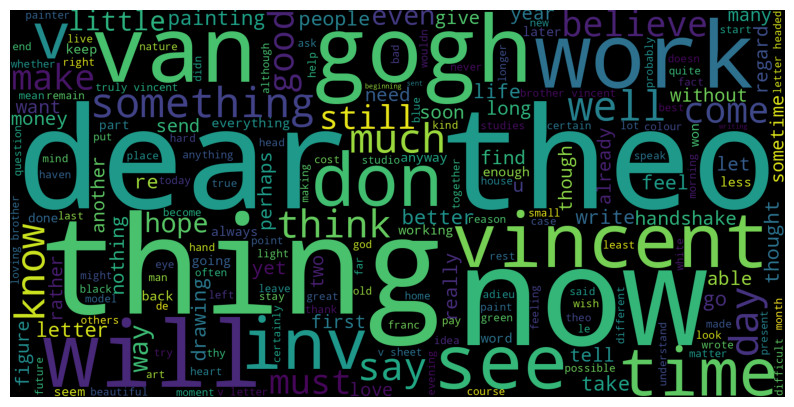

In [46]:
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud)

In [47]:
mask = np.array(Image.open('/home/fernando_cir/code/thecirocks/fer_projects/gogh/data/vicent.jpg'))
mask

array([[[149, 174, 155],
        [150, 175, 156],
        [148, 173, 154],
        ...,
        [ 70,  84,  84],
        [  7,  17,  16],
        [  0,   4,   4]],

       [[134, 159, 140],
        [141, 166, 147],
        [144, 169, 150],
        ...,
        [ 89, 103, 103],
        [ 38,  47,  46],
        [  2,   6,   7]],

       [[131, 156, 137],
        [143, 168, 149],
        [150, 175, 156],
        ...,
        [ 94, 108, 108],
        [ 66,  75,  74],
        [  0,   2,   3]],

       ...,

       [[125, 131, 127],
        [120, 126, 122],
        [118, 124, 120],
        ...,
        [100,  92,  81],
        [ 89,  82,  74],
        [  4,   0,   0]],

       [[117, 123, 119],
        [118, 124, 120],
        [122, 128, 124],
        ...,
        [101,  94,  86],
        [ 85,  80,  74],
        [ 15,  12,   7]],

       [[  0,   5,   1],
        [  0,   4,   0],
        [  0,   2,   0],
        ...,
        [  4,   0,   0],
        [  9,   5,   2],
        [  3,   0,   0]]

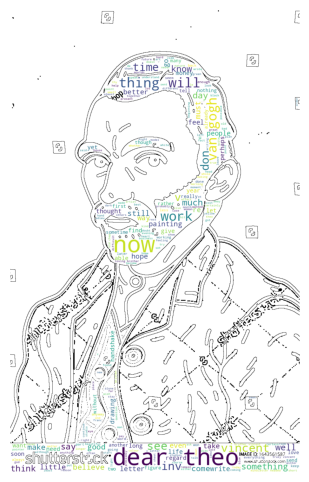

In [48]:
#mask = np.array(Image.open('/home/fernando_cir/code/thecirocks/fer_projects/gogh/vicent.jpg'))
mask = np.array(Image.open('/home/fernando_cir/code/thecirocks/fer_projects/gogh/data/vicent2.jpg'))
#alice_mask = np.array(Image.open(path.join(d, "alice_mask.png")))


mask = np.where(mask > 128, 255, 0)

wordcloud = WordCloud(stopwords=stopwords,
                      background_color = "white",
                      max_words=5000,
                      mask=mask,
                      max_font_size=500,
                      min_font_size=10,
                      contour_width=1,
                      width=2000, height=2500).generate(full_text)
                      #width=1600, height=800).generate(full_text)


# wordcloud = WordCloud(stopwords=stopwords,
#                       background_color="white",  # ou tente "black" para mais contraste
#                       max_words=2000,
#                       mask=mask,
#                       max_font_size=300,  # Aumente o tamanho máximo da fonte
#                       min_font_size=10,   # Aumente o tamanho mínimo para garantir legibilidade
#                       width=2000,         # Aumentar a resolução
#                       height=2500,        # Aumentar a resolução
#                       contour_color='black',  # Adiciona contorno às palavras
#                       contour_width=1     # Define a largura do contorno
#                      ).generate(full_text)



fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);

# 4) Sentiment Analysis

I decided to test two methods for sentiment analysis: **TextBlob** and **KMeans (unsupervised learning)**.

### TextBlob:
**TextBlob** is a Python library that uses a lexicon-based approach for sentiment analysis. To achieve better results, especially with older language, it is recommended to preprocess the text through tokenization and lemmatization.

### KMeans (Unsupervised Learning):
**KMeans** is an unsupervised machine learning algorithm. In this analysis, it proved to be the most effective method for our specific task.

### Important Note:
Despite being a powerful tool for NLP sentiment analysis, I chose not to use the classic **RoBERTa** model (an optimized version of **BERT** - Bidirectional Encoder Representations from Transformers) due to its limitation of 512 characters per input. Since 75% of the letters in our dataset exceed this limit, **RoBERTa** wasn't suitable for this project. Additionally, I chose not to use **VADER** because its lexicon is specifically tuned for modern social media, which doesn't align with the 150-year-old letters in our analysis. 

**Longformer** was also ruled out as there is no pre-trained model available on Hugging Face specifically for sentiment analysis. While models like **RoBERTa**, **Longformer**, and **BigBird** exist, they are either limited by the number of tokens or are pre-trained for general text processing rather than sentiment classification. To use them effectively for this task, I would need to train them for sentiment analysis across three classifications, which was not the objective of this project.

The goal here was to use pre-existing models, not to train one from scratch. Despite extensive research into Deep Learning models, I couldn't find a pre-trained model that fits the specific needs of this project.



In [49]:
print(list_letters)

['001', '002', '003', '004', '005', '006', '007', '008', '009', '011', '013', '015', '017', '019', '021', '022', '023', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '044', '046', '047', '048', '049', '050', '051', '052', '053', '054', '055', '056', '057', '058', '059', '060', '061', '062', '065', '066', '067', '068', '069', '070', '071', '072', '073', '077', '078', '079', '080', '081', '082', '083', '084', '085', '086', '087', '088', '089', '090', '091', '092', '093', '095', '096', '097', '099', '100', '101', '102', '103', '104', '105', '106', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '160', '161'

### Web Scraping and Cleaning again (Because we have different purposes, despite of traning web scraping skills)

In [50]:
# commenting because it took >10min
# #Web scraping it all again to agregate in a dataframe:

# #full_text = ""
# df = pd.DataFrame(columns=["text_letter", "num_letter"])

# for idx, num in enumerate(list_letters):
#     url = f'https://vangoghletters.org/vg/letters/let{num}/letter.html'
#     response = requests.get(url)
#     soup = BeautifulSoup(response.content, 'html.parser')
#     letter_html = soup.find_all("div", class_="p")

#     list = []
#     for sentence in letter_html:
#         string = sentence.string
#         if string:
#             list.append(string)

#     # Juntar as sentenças em uma única string para formar a carta
#     letter = " ".join(list)

#     # Remover os dois últimos caracteres da string (sujeira)
#     #letter = letter[:-2]

#     #adicionar o conteúdo da carta e o numero na carta no dataframe, ainda iterando na lista das cartas que sao Vicent>Theo
#     df.loc[idx] = [letter, num]

# print(df)

In [51]:
# import pickle

# # Caminho onde o arquivo será salvo
# file_path = '/home/fernando_cir/code/thecirocks/fer_projects/gogh/data/df.pkl'

# # Salvando a variável df
# with open(file_path, 'wb') as file:
#     pickle.dump(df, file)

## Text Blob Sentimental Analysis 
Notes:
- Polarity Score (negative/positive sentiment analysis score): [-1, 1];
- Subjectivity Score (objetive/subjective): [0, 1] where 0.0 is very objective and 1.0 is very subjective;
- Not necessary tokenize because it does for us, only Lemmitize;

Source: [TextBlob documentation](https://textblob.readthedocs.io/en/dev/quickstart.html#sentiment-analysis)

In [52]:
#Open file:
import pickle

file_path = '/home/fernando_cir/code/thecirocks/fer_projects/gogh/data/df.pkl'
with open(file_path, 'rb') as file:
    df = pickle.load(file)

print(df)

                                           text_letter num_letter
0    The Hague, 29 September 1872. My dear Theo, Th...        001
1    The Hague, 13 December 1872. My dear Theo, I d...        002
2    The Hague, January 1873 My dear Theo, I heard ...        003
3    The Hague, 28 Jan. 1873 My dear Theo, It’s goo...        004
4    The Hague, 17 March 1873 My dear Theo, Life in...        005
..                                                 ...        ...
650  My dear Theo, Original manuscript Amsterdam, V...        891
651  My dear Theo, The wall in the background green...        893
652  Here are three croquis – one of a figure of a ...        896
653  Handshakes in thought. Ever yours, Vincent Ori...        898
654  My dear brother, As regards the state of peace...        902

[655 rows x 2 columns]


In [53]:
df.head(5)

text_letter num_letter
0  The Hague, 29 September 1872. My dear Theo, Th...        001
1  The Hague, 13 December 1872. My dear Theo, I d...        002
2  The Hague, January 1873 My dear Theo, I heard ...        003
3  The Hague, 28 Jan. 1873 My dear Theo, It’s goo...        004
4  The Hague, 17 March 1873 My dear Theo, Life in...        005

In [54]:
df['text_letter'][0]

'The Hague, 29 September 1872. My dear Theo, Thanks for your letter, I was glad to hear that you got back safely. I missed you the first few days, and it was strange for me not to find you when I came home in the afternoon. We spent some pleasant days together, and actually did go for some walks and see a thing or two whenever we had the chance. Your loving Vincent Original manuscript Amsterdam, Van Gogh Museum, inv. no. b1 V/1962'

In [55]:
df['text_letter'][300]

'My dear Theo, I’ve sorted out my painting materials as far as was practicable, and replaced what I lacked and equipped myself with tram tickets &c. But, old chap, I would ask you to do your utmost to send me a little more, if at all possible, for I’m already broke because of one thing and another I absolutely had to have to be able to start in Scheveningen. It needn’t be very much, but just something to tide me over so that I’m not absolutely without a thing to drink in the dunes.  The photos are Sower, potato grubbers and Peat diggers; the last seemed to me to come out the best.  Don’t you think that was kind of the surveyors? They’re kind, cheerful fellows who’ve given me a lot of companionship.  When I’ve got my bearings in Scheveningen I’ll bring the woman along now and then to pose, or at least to indicate the position and size of figures.  I’ll be in no little difficulty if you absolutely cannot send anything extra. I’ve only taken what was definitely indispensable for the paint

In [56]:
df['text_letter'][301]

'My dear Theo, I don’t know how you intended those words, nor can I know. Your letter is too brief, but it gave me an unexpected blow right in the chest.  But I would like to know what the position is, whether you noticed something in me, that I wasn’t making progress or something.  So now my first consignment of photos to be shown to someone or other if needed coincides with your ‘as for the future, I can give you little hope’. Is there something in particular???  Long rows of diggers — poor fellows set to work by the city — in front of a piece of dune land that’s to be dug over. But to do that is terribly difficult.  My doing depends on your doing, in the sense that if you were to reduce what you send I couldn’t go on and would be desperate.  I, too, have an enormous feeling of faintness at times in the dunes or elsewhere, because there’s nothing coming in.  Look, Theo, I just hope that you aren’t losing heart, but truly, if you’re going to talk about ‘giving no hope for the future’ 

In [57]:
df['text_letter'][654]

'My dear brother, As regards the state of peace in your household, I’m just as convinced of the possibility of preserving it as of the storms that threaten it. What seems to me on my return – is that the painters themselves are increasingly at bay. Very well. But has the moment to make them understand the utility of a union not rather passed already? On the other hand a union, if it were formed, would go under if the rest went under. Then you’d perhaps tell me that dealers would unite for the Impressionists; that would be very fleeting. Anyway it seems to me that personal initiative remains ineffective, and having done the experiment, would one begin it again? Which would be simplest. Or you’d put them into the consignment of colours for me, adding the invoice or telling me how much they cost, and then he’d send you the money. Here one can’t find anything good in the way of colours. I’ve simplified my own order to a very bare minimum. Yours truly, Vincent. Foreground of green and pink 

## Basic cleaning:

In [58]:
#Removing spaces
df['text_letter'] = df['text_letter'].apply(lambda x: x.strip())

#Lower Case:
df['text_letter'] = df['text_letter'].apply(lambda x: x.lower())

#Removing numbers:
df['text_letter'] = df['text_letter'].apply(lambda x: ''.join(char for char in x if not char.isdigit()))

#Removing Punctuation and Symbols
import string
df['text_letter'] = df['text_letter'].apply(lambda x: ''.join(char for char in x if char not in string.punctuation))

#Removing HTML
df['text_letter'] = df['text_letter'].apply(lambda x: ''.join(char for char in x if char not in '<[^<]+?>'))

In [59]:
df['text_letter'][654]

'my dear brother as regards the state of peace in your household i’m just as convinced of the possibility of preserving it as of the storms that threaten it what seems to me on my return – is that the painters themselves are increasingly at bay very well but has the moment to make them understand the utility of a union not rather passed already on the other hand a union if it were formed would go under if the rest went under then you’d perhaps tell me that dealers would unite for the impressionists that would be very fleeting anyway it seems to me that personal initiative remains ineffective and having done the experiment would one begin it again which would be simplest or you’d put them into the consignment of colours for me adding the invoice or telling me how much they cost and then he’d send you the money here one can’t find anything good in the way of colours i’ve simplified my own order to a very bare minimum yours truly vincent foreground of green and pink grass on the left a gr

## Specific cleaning:

In [60]:
#text_remove = f'Original manuscript Amsterdam, Van Gogh Museum, inv. nos. b699 a-c V/1962 Sheets 2 and 3 were originally joine'
#pattern = r'Original manuscript Amsterdam, Van Gogh Museum, inv. nos. [a-zA-Z]\d{3} a-c V\/\d{4} Sheet(s)? \d+ and \d+ were originally (joine)?'
pattern1 = r'original manuscript amsterdam van gogh museum inv nos [a-z]+ a-c v/\d{4} sheet(s)? \d+ and \d+ were originally (joine)?'
pattern2 = 'original manuscript amsterdam van gogh museum'
pattern3 = r'inv nos [a-z]+ a-c v/\d{4}'
pattern4 = r'inv no [a-z]+ v/\d{2}'
pattern5 = r'inv nos'
pattern6 = r'[a-z]+\d{3,4} v/\d{4} \(sheet \d\)? and [a-z]+\d{3,4} v/\d{4}'
pattern7 = r'\s*sheet\s*$'
pattern8 = r'v/1962'
pattern9 = r'[a-z]+\d{3} [a-z]+-[a-z]+'
pattern10 = 'inv no'
pattern11 = r'[a-z]+\d{3} '
pattern12 = "letterhead goupil paris paris"
pattern13 = r'\s*b\s+v'

words = r'\b(the hague|london|paris|isleworth|dordrecht|amsterdam|ramsgate|brussels|' \
                 r'january|jan|february|feb|mar|march|april|may|june|july|aug|august|sept|' \
                 r'september|oct|october|nov|november|dec|december)\b'


In [61]:
patterns = [pattern1, pattern2, pattern3, pattern4, pattern5, pattern6, pattern7, pattern8, pattern9, pattern10, pattern11, pattern12, pattern13, words]
df['text_letter'] = df['text_letter'].map(lambda x: re.sub('|'.join(patterns), '', x, flags=re.IGNORECASE).strip())
#another strip just to confirm
df['text_letter'] = df['text_letter'].apply(lambda x: x.strip())

In [62]:
print(df['text_letter'][0])
print(df['text_letter'][300])
print(df['text_letter'][301])
print(df['text_letter'][654])
print(df['text_letter'][274])

my dear theo thanks for your letter i was glad to hear that you got back safely i missed you the first few days and it was strange for me not to find you when i came home in the afternoon we spent some pleasant days together and actually did go for some walks and see a thing or two whenever we had the chance your loving vincent
my dear theo i’ve sorted out my painting materials as far as was practicable and replaced what i lacked and equipped myself with tram tickets c but old chap i would ask you to do your utmost to send me a little more if at all possible for i’m already broke because of one thing and another i absolutely had to have to be able to start in scheveningen it needn’t be very much but just something to tide me over so that i’m not absolutely without a thing to drink in the dunes  the photos are sower potato grubbers and peat diggers the last seemed to me to come out the best  don’t you think that was kind of the surveyors they’re kind cheerful fellows who’ve given me a l

### Sanity check ok: df with letters cleaned.

In [63]:
df

text_letter num_letter
0    my dear theo thanks for your letter i was glad...        001
1    my dear theo i don’t doubt that it will give y...        002
2    my dear theo i heard from home that you arrive...        003
3    my dear theo it’s good that you answered me so...        004
4    my dear theo life in l will be very different ...        005
..                                                 ...        ...
650  my dear theo   bv we assume the letter is comp...        891
651  my dear theo the wall in the background green ...        893
652  here are three croquis – one of a figure of a ...        896
653           handshakes in thought ever yours vincent        898
654  my dear brother as regards the state of peace ...        902

[655 rows x 2 columns]

## Lemmatize
### Verbs, substantives, adjectives and adverbs using Spacy (POS - Part of Speech and Lemmitizing in once) 

In [64]:
import spacy

# Carregar o modelo de linguagem do spaCy
nlp = spacy.load("en_core_web_sm")

In [65]:
# Texto de exemplo
text = "This is a great example."

# Processar o texto com o spaCy
doc = nlp(text)

# Extrair os lemas de cada palavra no texto
lemmatized_text = [token.lemma_ for token in doc]

print(lemmatized_text)
print(doc)
print(text)

['this', 'be', 'a', 'great', 'example', '.']
This is a great example.
This is a great example.


In [66]:
def lemmatize_word(text):
    #instanciando com a função
    temp = nlp(text)

    #Retornando lemmatizado
    return [word.lemma_ for word in temp]

In [67]:
# Aplicar a lemmatização
df['lemmatized_text_letter'] = df['text_letter'].apply(lemmatize_word)
df.head(4)

text_letter num_letter  \
0  my dear theo thanks for your letter i was glad...        001   
1  my dear theo i don’t doubt that it will give y...        002   
2  my dear theo i heard from home that you arrive...        003   
3  my dear theo it’s good that you answered me so...        004   

                              lemmatized_text_letter  
0  [my, dear, theo, thank, for, your, letter, I, ...  
1  [my, dear, theo, I, do, not, doubt, that, it, ...  
2  [my, dear, theo, I, hear, from, home, that, yo...  
3  [my, dear, theo, it, ’, good, that, you, answe...

In [68]:
print(df['text_letter'][300])
print(df['lemmatized_text_letter'][300])

my dear theo i’ve sorted out my painting materials as far as was practicable and replaced what i lacked and equipped myself with tram tickets c but old chap i would ask you to do your utmost to send me a little more if at all possible for i’m already broke because of one thing and another i absolutely had to have to be able to start in scheveningen it needn’t be very much but just something to tide me over so that i’m not absolutely without a thing to drink in the dunes  the photos are sower potato grubbers and peat diggers the last seemed to me to come out the best  don’t you think that was kind of the surveyors they’re kind cheerful fellows who’ve given me a lot of companionship  when i’ve got my bearings in scheveningen i’ll bring the woman along now and then to pose or at least to indicate the position and size of figures  i’ll be in no little difficulty if you absolutely cannot send anything extra i’ve only taken what was definitely indispensable for the painting box but have none

In [69]:
from textblob import TextBlob

In [70]:
df['lemmatized_text_letter'][300]

['my',
 'dear',
 'theo',
 'I',
 '’ve',
 'sort',
 'out',
 'my',
 'painting',
 'material',
 'as',
 'far',
 'as',
 'be',
 'practicable',
 'and',
 'replace',
 'what',
 'I',
 'lack',
 'and',
 'equip',
 'myself',
 'with',
 'tram',
 'ticket',
 'c',
 'but',
 'old',
 'chap',
 'I',
 'would',
 'ask',
 'you',
 'to',
 'do',
 'your',
 'utmost',
 'to',
 'send',
 'I',
 'a',
 'little',
 'more',
 'if',
 'at',
 'all',
 'possible',
 'for',
 'I',
 '’m',
 'already',
 'break',
 'because',
 'of',
 'one',
 'thing',
 'and',
 'another',
 'I',
 'absolutely',
 'have',
 'to',
 'have',
 'to',
 'be',
 'able',
 'to',
 'start',
 'in',
 'scheveningen',
 'it',
 'need',
 'n’t',
 'be',
 'very',
 'much',
 'but',
 'just',
 'something',
 'to',
 'tide',
 'I',
 'over',
 'so',
 'that',
 'I',
 '’m',
 'not',
 'absolutely',
 'without',
 'a',
 'thing',
 'to',
 'drink',
 'in',
 'the',
 'dune',
 ' ',
 'the',
 'photo',
 'be',
 'sow',
 'potato',
 'grubber',
 'and',
 'peat',
 'digger',
 'the',
 'last',
 'seem',
 'to',
 'I',
 'to',
 'come

In [71]:
' '.join(df['lemmatized_text_letter'][0])

'my dear theo thank for your letter I be glad to hear that you get back safely I miss you the first few day and it be strange for I not to find you when I come home in the afternoon we spend some pleasant day together and actually do go for some walk and see a thing or two whenever we have the chance your love vincent'

## Now testing for 1 letter

### Remembering:
- Polarity Score (negative/positive sentiment analysis score): [-1, 1];
- Subjectivity Score (objetive/subjective): [0, 1] where 0.0 is very objective and 1.0 is very subjective;

In [72]:
test = TextBlob(' '.join(df['lemmatized_text_letter'][0]))
#test.sentiment
print(f'The Sentiment analysis: {test.sentiment.polarity:.2f}')
print(f'The Objective analysis: {test.sentiment.subjectivity:.2f}')

The Sentiment analysis: 0.25
The Objective analysis: 0.42


In [73]:
print(df['text_letter'][0])

my dear theo thanks for your letter i was glad to hear that you got back safely i missed you the first few days and it was strange for me not to find you when i came home in the afternoon we spent some pleasant days together and actually did go for some walks and see a thing or two whenever we had the chance your loving vincent


In [74]:
df.head(2)

text_letter num_letter  \
0  my dear theo thanks for your letter i was glad...        001   
1  my dear theo i don’t doubt that it will give y...        002   

                              lemmatized_text_letter  
0  [my, dear, theo, thank, for, your, letter, I, ...  
1  [my, dear, theo, I, do, not, doubt, that, it, ...

In [75]:
def polarity_score(letter):
    temp = TextBlob(' '.join(letter))
    return temp.sentiment.polarity, temp.sentiment.subjectivity

In [76]:
df[["polarity_score", "objective_score"]] = df["lemmatized_text_letter"].apply(polarity_score).apply(pd.Series)

In [77]:
df.head(4)

text_letter num_letter  \
0  my dear theo thanks for your letter i was glad...        001   
1  my dear theo i don’t doubt that it will give y...        002   
2  my dear theo i heard from home that you arrive...        003   
3  my dear theo it’s good that you answered me so...        004   

                              lemmatized_text_letter  polarity_score  \
0  [my, dear, theo, thank, for, your, letter, I, ...        0.248148   
1  [my, dear, theo, I, do, not, doubt, that, it, ...        0.210000   
2  [my, dear, theo, I, hear, from, home, that, yo...        0.262601   
3  [my, dear, theo, it, ’, good, that, you, answe...        0.302116   

   objective_score  
0         0.416667  
1         0.490278  
2         0.579318  
3         0.596561

In [78]:
bin = np.linspace(df["polarity_score"].min(),
                  df["polarity_score"].max(),
                  4) #4 pois é ponto de divisão e não segmento.

print(bin)

[-0.39        0.02333333  0.43666667  0.85      ]


In [79]:
print(bin[0])
print(bin[1])
print(bin[2])
print(bin[3])

-0.38999999999999996
0.023333333333333373
0.4366666666666667
0.85


In [80]:
df["cluster_polarity"] = df["polarity_score"].apply(lambda x: 0 if bin[0] <= x < bin[1]        #0 = Negative
                                                    else (1 if bin[1] <= x <= bin[2]        #1 = Neutral
                                                    else 2 if bin[2] < x <= bin[3] else None))   #2 = Positive

df.head(4)

# 0 = Negative
# 1 = Neutral
# 2 = Positive

text_letter num_letter  \
0  my dear theo thanks for your letter i was glad...        001   
1  my dear theo i don’t doubt that it will give y...        002   
2  my dear theo i heard from home that you arrive...        003   
3  my dear theo it’s good that you answered me so...        004   

                              lemmatized_text_letter  polarity_score  \
0  [my, dear, theo, thank, for, your, letter, I, ...        0.248148   
1  [my, dear, theo, I, do, not, doubt, that, it, ...        0.210000   
2  [my, dear, theo, I, hear, from, home, that, yo...        0.262601   
3  [my, dear, theo, it, ’, good, that, you, answe...        0.302116   

   objective_score  cluster_polarity  
0         0.416667                 1  
1         0.490278                 1  
2         0.579318                 1  
3         0.596561                 1

## Understanding top 10 and bottom 10 polarity scores words

In [81]:
# Dic to save unique values
dic_unique = {}

def calculate(lemmatized_text):
    # iteranting in each word (but for unique words)
    for word in lemmatized_text:
        if word not in dic_unique:  # confirm if word it is not already in dic
            dic_unique[word] = TextBlob(word).sentiment.polarity

In [82]:
print(dic_unique)

{}


In [83]:
# Aplicar a função a cada linha do DataFrame
df['lemmatized_text_letter'].apply(calculate)
print(dic_unique)

{'my': 0.0, 'dear': 0.0, 'theo': 0.0, 'thank': 0.0, 'for': 0.0, 'your': 0.0, 'letter': 0.0, 'I': 0.0, 'be': 0.0, 'glad': 0.5, 'to': 0.0, 'hear': 0.0, 'that': 0.0, 'you': 0.0, 'get': 0.0, 'back': 0.0, 'safely': 0.5, 'miss': 0.0, 'the': 0.0, 'first': 0.25, 'few': -0.2, 'day': 0.0, 'and': 0.0, 'it': 0.0, 'strange': -0.05, 'not': 0.0, 'find': 0.0, 'when': 0.0, 'come': 0.0, 'home': 0.0, 'in': 0.0, 'afternoon': 0.0, 'we': 0.0, 'spend': 0.0, 'some': 0.0, 'pleasant': 0.7333333333333333, 'together': 0.0, 'actually': 0.0, 'do': 0.0, 'go': 0.0, 'walk': 0.0, 'see': 0.0, 'a': 0.0, 'thing': 0.0, 'or': 0.0, 'two': 0.0, 'whenever': 0.0, 'have': 0.0, 'chance': 0.0, 'love': 0.5, 'vincent': 0.0, 'doubt': 0.0, 'will': 0.0, 'give': 0.0, 'pleasure': 0.0, '’': 0.0, 'such': 0.0, 'fine': 0.4166666666666667, 'firm': -0.2, 'big': 0.0, 'change': 0.0, 'hope': 0.0, 'so': 0.0, 'much': 0.2, 'before': 0.0, 'leave': 0.0, '’ll': 0.0, 'lot': 0.0, 'talk': 0.0, 'about': 0.0, 'believe': 0.0, ' ': 0.0, 'very': 0.2, 'city': 0

In [84]:
# Converter o dicionário global para uma lista de tuplas (palavra, polaridade)
list_unique = list(dic_unique.items())
print(list_unique)

[('my', 0.0), ('dear', 0.0), ('theo', 0.0), ('thank', 0.0), ('for', 0.0), ('your', 0.0), ('letter', 0.0), ('I', 0.0), ('be', 0.0), ('glad', 0.5), ('to', 0.0), ('hear', 0.0), ('that', 0.0), ('you', 0.0), ('get', 0.0), ('back', 0.0), ('safely', 0.5), ('miss', 0.0), ('the', 0.0), ('first', 0.25), ('few', -0.2), ('day', 0.0), ('and', 0.0), ('it', 0.0), ('strange', -0.05), ('not', 0.0), ('find', 0.0), ('when', 0.0), ('come', 0.0), ('home', 0.0), ('in', 0.0), ('afternoon', 0.0), ('we', 0.0), ('spend', 0.0), ('some', 0.0), ('pleasant', 0.7333333333333333), ('together', 0.0), ('actually', 0.0), ('do', 0.0), ('go', 0.0), ('walk', 0.0), ('see', 0.0), ('a', 0.0), ('thing', 0.0), ('or', 0.0), ('two', 0.0), ('whenever', 0.0), ('have', 0.0), ('chance', 0.0), ('love', 0.5), ('vincent', 0.0), ('doubt', 0.0), ('will', 0.0), ('give', 0.0), ('pleasure', 0.0), ('’', 0.0), ('such', 0.0), ('fine', 0.4166666666666667), ('firm', -0.2), ('big', 0.0), ('change', 0.0), ('hope', 0.0), ('so', 0.0), ('much', 0.2), 

In [85]:
# Ordenar as palavras pela polaridade
rank_words = sorted(list_unique, key=lambda x: x[1], reverse=True)
print(rank_words)

[('wonderful', 1.0), ('perfect', 1.0), ('magnificent', 1.0), ('exquisite', 1.0), ('delightful', 1.0), ('excellent', 1.0), ('perfectly', 1.0), ('superb', 1.0), ('priceless', 1.0), ('incredibly', 0.9), ('ideal', 0.9), ('brilliant', 0.9), ('brilliantly', 0.9), ('beautiful', 0.85), ('beautifully', 0.85), ('splendid', 0.8333333333333334), ('happy', 0.8), ('happily', 0.8), ('joy', 0.8), ('great', 0.8), ('fly', 0.8), ('win', 0.8), ('brave', 0.8), ('welcome', 0.8), ('proud', 0.8), ('elect', 0.8), ('attractive', 0.8), ('greatly', 0.8), ('intelligent', 0.8), ('expressive', 0.8), ('intelligently', 0.8), ('remarkable', 0.75), ('successful', 0.75), ('remarkably', 0.75), ('successfully', 0.75), ('pleasant', 0.7333333333333333), ('pleasantly', 0.7333333333333333), ('bright', 0.7000000000000001), ('brightly', 0.7000000000000001), ('good', 0.7), ('fair', 0.7), ('wisely', 0.7), ('happiness', 0.7), ('heroic', 0.7), ('beloved', 0.7), ('wise', 0.7), ('fairly', 0.7), ('fascinating', 0.7), ('delighted', 0.7)

In [86]:
# Extrair as 10 palavras com maior polaridade
bigger_10 = rank_words[:10]

# Extrair as 10 palavras com menor polaridade
lower_10 = rank_words[-10:]

# Exibir as palavras com maior polaridade
print(f"Bigger scores: {bigger_10}")

# Exibir as palavras com menor polaridade
print(f"Lower scores: {lower_10}")

Bigger scores: [('wonderful', 1.0), ('perfect', 1.0), ('magnificent', 1.0), ('exquisite', 1.0), ('delightful', 1.0), ('excellent', 1.0), ('perfectly', 1.0), ('superb', 1.0), ('priceless', 1.0), ('incredibly', 0.9)]
Lower scores: [('miserable', -1.0), ('disgusting', -1.0), ('boring', -1.0), ('cruel', -1.0), ('miserably', -1.0), ('nasty', -1.0), ('grim', -1.0), ('insane', -1.0), ('hysterical', -1.0), ('horribly', -1.0)]


In [87]:
print(f"The rank of words contain {len(rank_words)} words")

The rank of words contain 8026 words


In [116]:
big = rank_words[:500]
low = rank_words[7526:]

In [117]:
big[0]

('wonderful', 1.0)

In [118]:
big = [word for word, score in big]
big[0]

'wonderful'

In [119]:
big = ' '.join(big)

In [120]:
low = [word for word, score in low]

In [121]:
low = ' '.join(low)

low

'haricot beans lentil grocery colonial foodstuff consumption syphilis menagerie fighter sluggishness fateful got advantageous idleness stylistically depiction blameworthy egyptian obelisk dutchwoman seven subsequent fatherhood consecutive lov’d buckingham divorce manipulative wolsey archbishop forfeit thaught trod shoal wrack fle corruption cockroach identify f raisonnés redo incorrectly identification passively imbecilic permission sicken incompatibility côté grimpait rameaux entrelacés entouraient fenêtres feston couvraient si complétement façade peinte tuile eût cru berceau verdure l’arrièresaison montraient raisin blancs bleus traver feuillage éclatant arrêtion enfant l’école devant jolie maisonnette hercule pentup unwise \n flabby stupefy lightning conductor coarsely reaper selfsecurity halftone industrialist indulgent selflove brand solitude lining facilitate halt consent stopgap champs moonrise germinate unshaken detached unprepared alpille hike overtake abominable springtime mo

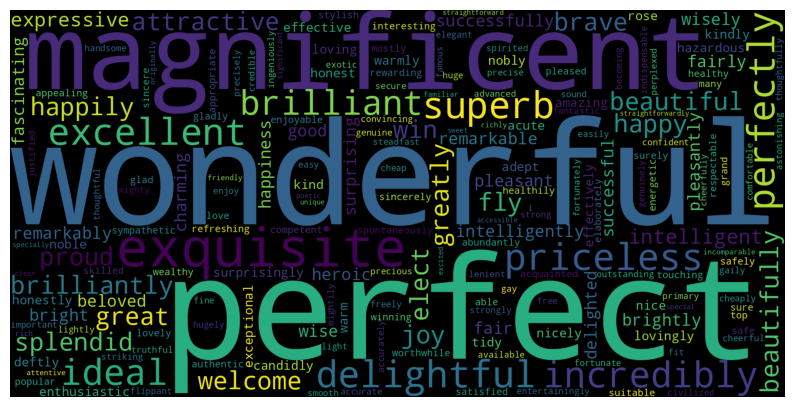

In [122]:
wordcloud2 = WordCloud(stopwords=stopwords,
                      background_color = "black",
                      max_words=200,
                      width=1600, height=800).generate(big)

fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud2, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud2)

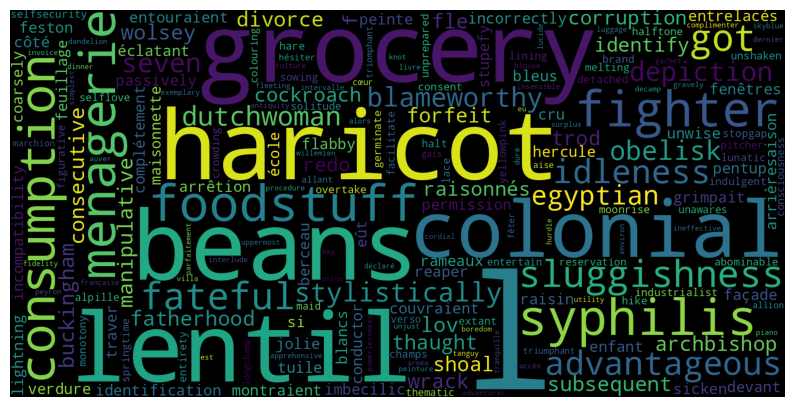

In [123]:
wordcloud3 = WordCloud(stopwords=stopwords,
                      background_color = "black",
                      max_words=200,
                      width=1600, height=800).generate(low)

fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud3, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud3)

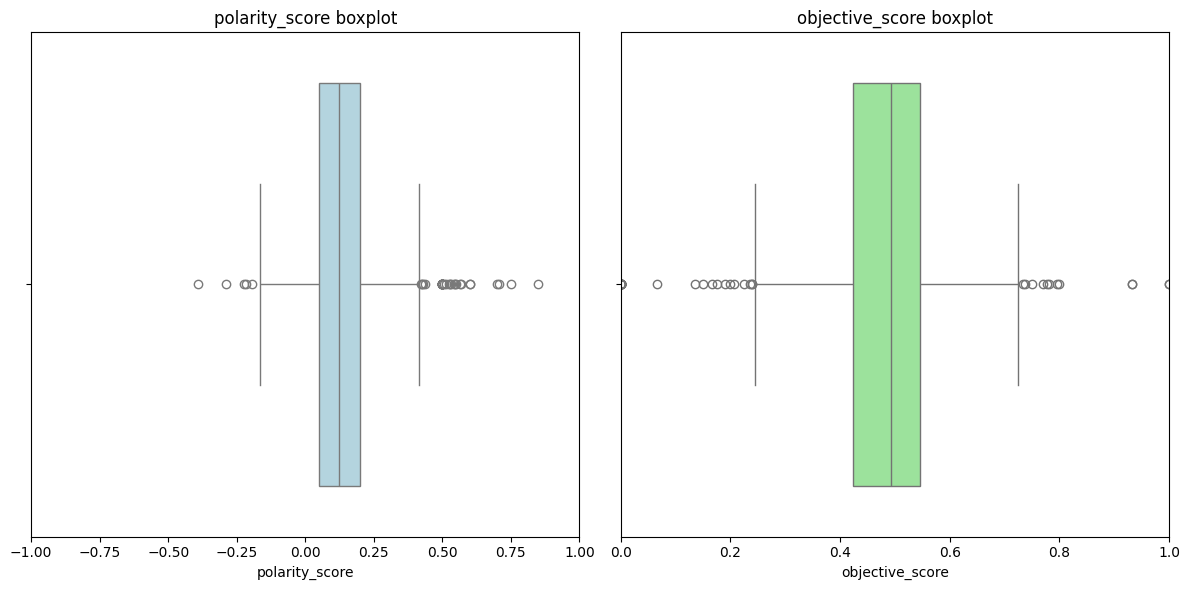

In [96]:
# sns.histplot(df["polarity_score"])
# plt.xlim(-1, 1)
# plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

#polarity_score
sns.boxplot(x=df["polarity_score"], ax=axes[0], color="#ADD8E6")
axes[0].set_title("polarity_score boxplot")
axes[0].set_xlim(-1, 1)

# objective_score
sns.boxplot(x=df["objective_score"], ax=axes[1], color="#90EE90")
axes[1].set_title("objective_score boxplot")
axes[1].set_xlim(0, 1)

plt.tight_layout()
plt.show()

As we can see above: 
- the majority of the polarity_score are between 0,10 ~ 0,22 indicating positive letters;
- fewer negative outliers in polarity_score;
- We can see that the majority of the objectiviness of the letters are in the middle;

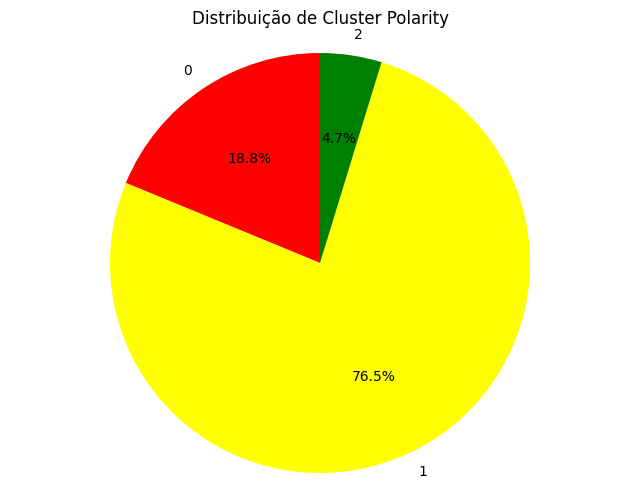

In [97]:
# Definir as contagens dos clusters
polarity_counts = df['cluster_polarity'].value_counts().sort_index()

# Plotar gráfico de pizza
fig, ax = plt.subplots(figsize=(8, 6))

ax.pie(polarity_counts, labels=polarity_counts.index, autopct='%1.1f%%', startangle=90, colors=['red', 'yellow', 'green'])

# Garantir que o gráfico seja desenhado como um círculo
ax.axis('equal')

plt.title('Distribuição de Cluster Polarity')
plt.show()
# 0 = Negative
# 1 = Neutral
# 2 = Positive


In [98]:
## Testing the model Big Bird from Transformer's Hugging Face:

In [99]:
# from transformers import BigBirdTokenizer, BigBirdForSequenceClassification
# import torch

# # Carregar o tokenizer e o modelo pré-treinado BigBird para 3 classes
# tokenizer = BigBirdTokenizer.from_pretrained('google/bigbird-roberta-base')

# # 3 labels para classificação multiclasse
# model = BigBirdForSequenceClassification.from_pretrained('google/bigbird-roberta-base', num_labels=3)

# # Exemplo de frase simples para análise
# frase = df['text_letter'][0]

# # Tokenizar a frase
# inputs = tokenizer(frase, return_tensors='pt', padding=True, truncation=True, max_length=4096)

# # Fazer a predição
# with torch.no_grad():
#     outputs = model(**inputs)

# # Extrair os logits (valores preditivos brutos)
# logits = outputs.logits

# # Converter logits em probabilidades usando softmax
# probabilities = torch.softmax(logits, dim=1)

# # Mapeamento das classes
# #label_mapping = {0: 'negative', 1: 'neutral', 2: 'positive'}

# # Encontrar a classe com a maior probabilidade
# predicted_class = torch.argmax(probabilities).item()

# # Obter o rótulo correspondente
# predicted_label = label_mapping[predicted_class]

# # Exibir as probabilidades e a classe predita
# print(f"Probabilidades: {probabilities}")
# print(f"Classe predita: {predicted_label}")


In [100]:
# from transformers import LongformerTokenizer, LongformerForSequenceClassification
# import torch

# # Carregar o tokenizer e o modelo Longformer
# tokenizer = LongformerTokenizer.from_pretrained('allenai/longformer-base-4096')

# # Especificar o número de classes (3 classes: neutro, positivo, negativo)
# model = LongformerForSequenceClassification.from_pretrained('allenai/longformer-base-4096', num_labels=3)

# # Tokenizar o texto
# inputs = tokenizer("This text is positive", return_tensors="pt")

# # Definir o label: 0 = negativo, 1 = neutro, 2 = positivo
# labels = torch.tensor([2]).unsqueeze(0)  # Batch size 1

# # Rodar o modelo e calcular a loss
# outputs = model(**inputs, labels=labels)
# loss = outputs.loss
# logits = outputs.logits

# # Aplicar softmax para obter probabilidades
# probabilities = torch.softmax(logits, dim=-1)

# print("Loss:", loss)
# print("Logits:", logits)
# print("Probabilities:", probabilities)


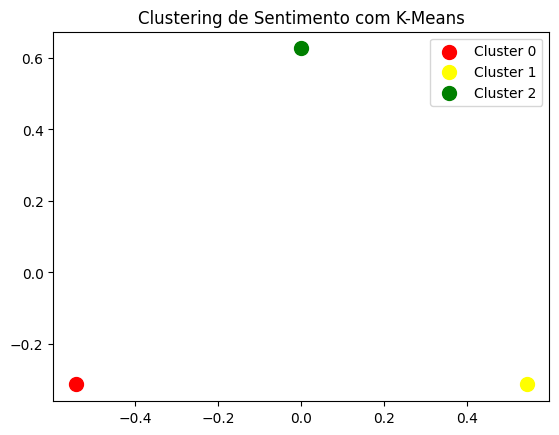


Cluster 0:
['I feel sad today']

Cluster 1:
['I feel nothing today']

Cluster 2:
['I feel Happy today']


In [101]:
#Quick test to check if Kmeans works

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Suponha que você tenha uma lista de textos longos
textos = [
    "I feel Happy today",
    "I feel sad today",
    "I feel nothing today",
]

# Passo 1: Vetorização com TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words=None)
tfidf_matrix = tfidf_vectorizer.fit_transform(textos)

# Passo 2: Aplicar K-Means com 3 clusters (positivo, negativo, neutro)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Exibir os clusters atribuídos
clusters = kmeans.labels_

# Passo 3: Reduzir a dimensionalidade com PCA para visualizar os clusters
pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(tfidf_matrix.toarray())

# Criar um DataFrame para armazenar as informações
df_temp = pd.DataFrame({'text': textos, 'cluster': clusters})

# Passo 4: Visualização dos clusters
colors = ['red', 'yellow', 'green']
for i in range(num_clusters):
    points = scatter_plot_points[df_temp['cluster'] == i]
    plt.scatter(points[:, 0], points[:, 1], s=100, c=colors[i], label=f'Cluster {i}')

plt.title('Clustering de Sentimento com K-Means')
plt.legend()
plt.show()

# Passo 5: Ver os textos de cada cluster
for i in range(num_clusters):
    print(f"\nCluster {i}:")
    print(df_temp[df_temp['cluster'] == i]['text'].values)


In [102]:
# 0 = Negative
# 1 = Neutral
# 2 = Positive

In [103]:
df

text_letter num_letter  \
0    my dear theo thanks for your letter i was glad...        001   
1    my dear theo i don’t doubt that it will give y...        002   
2    my dear theo i heard from home that you arrive...        003   
3    my dear theo it’s good that you answered me so...        004   
4    my dear theo life in l will be very different ...        005   
..                                                 ...        ...   
650  my dear theo   bv we assume the letter is comp...        891   
651  my dear theo the wall in the background green ...        893   
652  here are three croquis – one of a figure of a ...        896   
653           handshakes in thought ever yours vincent        898   
654  my dear brother as regards the state of peace ...        902   

                                lemmatized_text_letter  polarity_score  \
0    [my, dear, theo, thank, for, your, letter, I, ...        0.248148   
1    [my, dear, theo, I, do, not, doubt, that, it, ...        0.210000   
2    [my, dear, theo, I, hear, from, home, that, yo...        0.262601   
3    [my, dear, theo, it, ’, good, that, you, answe...        0.302116   
4    [my, dear, theo, life, in, l, will, be, very, ...        0.226347   
..                                                 ...             ...   
650  [my, dear, theo,   , bv, we, assume, the, lett...        0.000000   
651  [my, dear, theo, the, wall, in, the, backgroun...        0.028182   
652  [here, be, three, croquis, –, one, of, a, figu...        0.144103   
653     [handshake, in, thought, ever, yours, vincent]        0.000000   
654  [my, dear, brother, as, regard, the, state, of...        0.152983   

     objective_score  cluster_polarity  
0           0.416667                 1  
1           0.490278                 1  
2           0.579318                 1  
3           0.596561                 1  
4           0.543214                 1  
..               ...               ...  
650         0.500000                 0  
651         0.458182                 1  
652         0.435641                 1  
653         0.000000                 0  
654         0.378866                 1  

[655 rows x 6 columns]

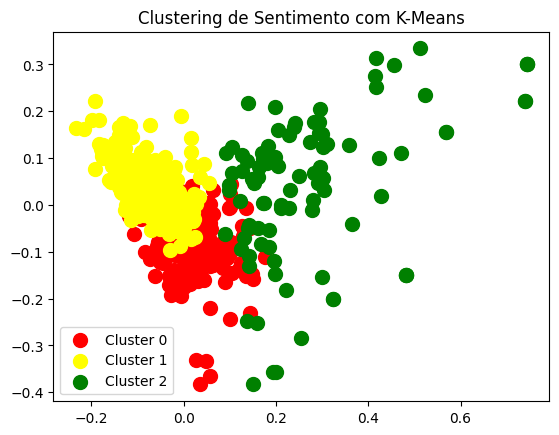


Cluster 0:
['my dear theo thanks for your letter i was glad to hear that you got back safely i missed you the first few days and it was strange for me not to find you when i came home in the afternoon we spent some pleasant days together and actually did go for some walks and see a thing or two whenever we had the chance your loving vincent'
 'my dear theo and now old chap i wish you well think of me from time to time and write to me soon it’s so refreshing when i receive a letter vincent slowly the toll of the angelusbell resounded o’er the fields as they blissfully bathed in the gold of the evening sun o solemn moving moment when every mother in the village suddenly stops the whirring of the wheel to bless herself with the sign of the cross while in the field the farmer reins in his steaming horses and behind the plough bares his head to murmur an ave o solemn moving moment when the bell that proclaims far and wide the end of the day’s work makes those powerful dripping heads bow do

In [104]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Passo 1: Vetorização com TF-IDF
# tfidf_vectorizer = TfidfVectorizer(stop_words=None, max_features=5000, min_df=2)
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_features=6000)
#Stop words pois nao faz sentido
#min_df=2 ignora palavras que aparecem em só 1 carta
#max feature limita a quantidade de palavras
tfidf_matrix = tfidf_vectorizer.fit_transform(df["text_letter"])

# Passo 2: Aplicar K-Means com 3 clusters (positivo, negativo, neutro)
num_clusters = 3
# kmeans = KMeans(n_clusters=num_clusters,
#                 random_state=0)  # não escolhe centróides aleatórios

kmeans = KMeans(n_clusters=num_clusters,
                random_state=42,
                n_init=5,
                max_iter=1000)


kmeans.fit(tfidf_matrix)

# Exibir os clusters atribuídos
clusters = kmeans.labels_

# Passo 3: Reduzir a dimensionalidade para n=2 com PCA para visualizar os clusters
pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(tfidf_matrix.toarray())

# Criar um DataFrame para armazenar as informações
df['cluster_kmeans'] = clusters  # Certifique-se de usar a coluna 'cluster_kmeans'

# Passo 4: Visualização dos clusters
colors = ['red', 'yellow', 'green']
for i in range(num_clusters):
    points = scatter_plot_points[df['cluster_kmeans'] == i]  # Use 'cluster_kmeans' aqui
    plt.scatter(points[:, 0], points[:, 1], s=100, c=colors[i], label=f'Cluster {i}')

plt.title('Clustering de Sentimento com K-Means')
plt.legend()
plt.show()

# Passo 5: Ver os textos de cada cluster
for i in range(num_clusters):
    print(f"\nCluster {i}:")
    print(df[df['cluster_kmeans'] == i]['text_letter'].values)  # Use 'cluster_kmeans' aqui também


In [105]:
# 0 = Negative
# 1 = Neutral
# 2 = Positive

In [106]:
#Listar as top 10 palavras de cada cluster
terms = tfidf_vectorizer.get_feature_names_out()  # Obter os nomes das palavras

# Para cada cluster, encontramos as palavras mais representativas (as maiores nos centróides)
for i in range(num_clusters):
    print(f"\nTop 10 palavras no Cluster {i}:")
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]  # Ordena as palavras de cada cluster
    top_words = [terms[ind] for ind in order_centroids[i, :15]]  # Pega as 10 palavras mais importantes
    print(", ".join(top_words))


Top 10 palavras no Cluster 0:
theo, vincent, dear, letter, ll, blue, like, ve, handshake, days, white, yellow, light, time, van

Top 10 palavras no Cluster 1:
ll, work, don, ve, things, think, like, time, know, better, say, come, good, little, theo

Top 10 palavras no Cluster 2:
loving, brother, vincent, theo, dear, headed, letter, adieu, soon, write, thought, wish, regards, handshake, truly


## The KMeans couldn't understand the sentimental, despite of clusterizing it

In [107]:
df.head(2)

text_letter num_letter  \
0  my dear theo thanks for your letter i was glad...        001   
1  my dear theo i don’t doubt that it will give y...        002   

                              lemmatized_text_letter  polarity_score  \
0  [my, dear, theo, thank, for, your, letter, I, ...        0.248148   
1  [my, dear, theo, I, do, not, doubt, that, it, ...        0.210000   

   objective_score  cluster_polarity  cluster_kmeans  
0         0.416667                 1               0  
1         0.490278                 1               2

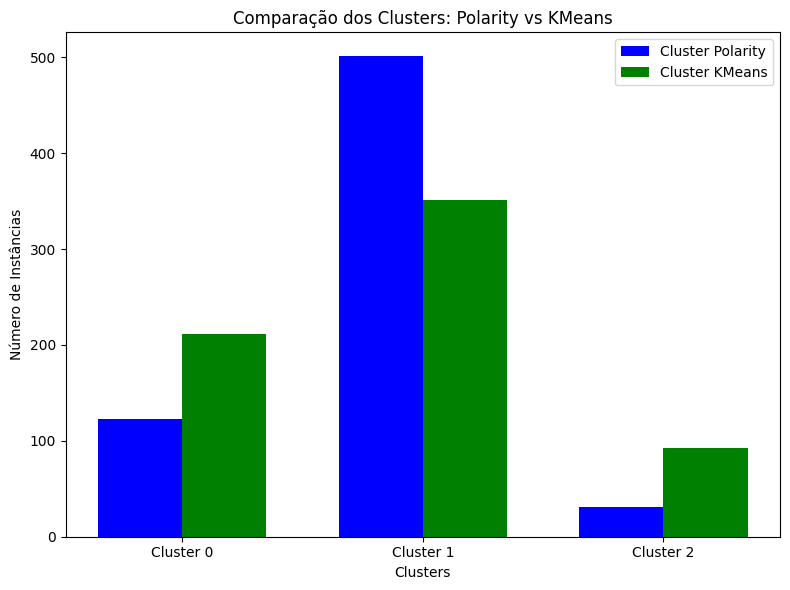

In [108]:
import numpy as np

# Definir as contagens dos clusters
polarity_counts = df['cluster_polarity'].value_counts().sort_index()
kmeans_counts = df['cluster_kmeans'].value_counts().sort_index()

# Configurar o gráfico de barras agrupadas
bar_width = 0.35
index = np.arange(3)  # Para clusters 0, 1, 2

fig, ax = plt.subplots(figsize=(8, 6))

# Plotar as barras para cluster_polarity e cluster_kmeans
bar1 = plt.bar(index, polarity_counts, bar_width, label='Cluster Polarity', color='blue')
bar2 = plt.bar(index + bar_width, kmeans_counts, bar_width, label='Cluster KMeans', color='green')

plt.xlabel('Clusters')
plt.ylabel('Número de Instâncias')
plt.title('Comparação dos Clusters: Polarity vs KMeans')
plt.xticks(index + bar_width / 2, ['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.legend()

plt.tight_layout()
plt.show()


In [109]:
#ESCOLHIDO O TEXT BLOB

### PS/Bonus analysis.: WHY NOT Classic RoBERTa?
### Proving why it is not recomended to use the RoBERTa model: this model has a limitation of 512 tokens, and 76% of our letters have more than 512 characters (as proven below).

### That said, we will use the Longformer model, which is recommended for long texts.

In [110]:
list = []
for i in range(0, 654):
    temp = len(df["text_letter"][i])
    list.append(temp)

print(list)

[329, 492, 1224, 351, 843, 78, 142, 111, 192, 4361, 96, 580, 361, 205, 123, 844, 271, 173, 241, 265, 215, 146, 181, 738, 1151, 663, 382, 26, 116, 247, 1203, 89, 95, 384, 95, 68, 161, 124, 177, 74, 504, 116, 337, 399, 1843, 188, 342, 232, 466, 193, 471, 1696, 305, 2069, 133, 221, 96, 192, 122, 352, 182, 105, 886, 792, 836, 854, 342, 511, 816, 172, 1085, 45, 2128, 918, 2874, 2716, 140, 6591, 3531, 1299, 3130, 503, 2540, 623, 109, 1266, 2163, 5647, 179, 45, 623, 140, 559, 667, 282, 339, 694, 1466, 878, 1252, 8019, 7923, 476, 612, 326, 297, 67, 1162, 2768, 66, 1457, 486, 1322, 881, 169, 3154, 272, 373, 2038, 361, 40, 356, 793, 666, 2261, 138, 279, 762, 223, 1282, 2350, 570, 2330, 939, 3795, 3288, 6145, 847, 354, 2143, 1654, 2669, 1785, 1392, 1148, 115, 918, 215, 353, 444, 678, 381, 1484, 247, 338, 1279, 1752, 4692, 4325, 2670, 4953, 501, 674, 3270, 1567, 118, 1026, 2232, 1055, 552, 873, 2357, 748, 871, 448, 1711, 1061, 528, 1011, 1377, 867, 330, 2300, 533, 3758, 781, 1024, 2168, 335, 436, 

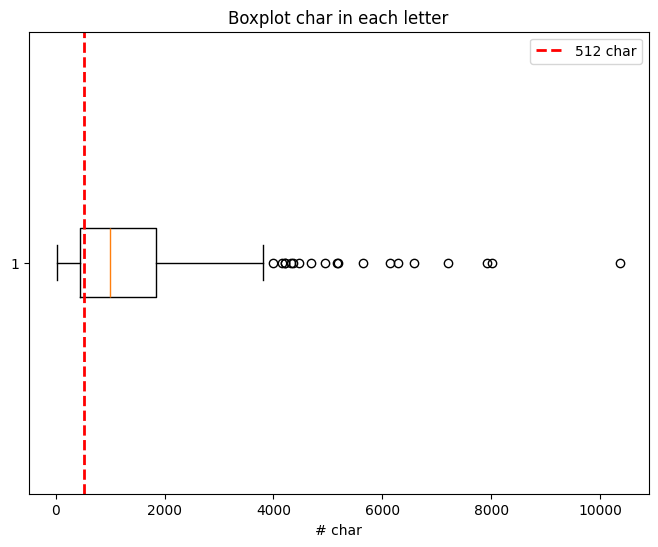

In [111]:
plt.figure(figsize=(8, 6))
plt.boxplot(list, vert=False)

plt.axvline(x=512, color='red', linestyle='dashed', linewidth=2, label='512 char')

plt.title('Boxplot char in each letter')
plt.xlabel('# char')
plt.legend()

# Mostrar o gráfico
plt.show()

In [112]:
more_512 = sum(1 for num in list if num >=512) / len(list)
more_512

0.7110091743119266

## JOB: DONE ✅